#Smarthphone Classification

> En el presente problema, se le pide predecir en qué rango de precio se encontrará un smartphone con ciertas características, para eso usará el modelo de predición de árboles de clasificación



###Diccionario de Datos:

![texto alternativo](https://drive.google.com/uc?id=1KXjM7fibU8RzzI3KCqA5Sh2AySBR1PbZ)

###Importar CSV

In [0]:
import pandas as pd
#Smarthphone.csv
df = pd.read_csv("Smarthphone.csv")

###Limpieza de Datos

> Haga los ajustes que crea conveniente (si los hubiera) para poder procesar la data



In [19]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


###Data de Entrenamiento y Validación

> Nuestro target es el "price_range" ¿Cúantas etiquetas o clases tiene?



In [31]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

> Separe los atributos de los targets



In [0]:
# X e Y
x = df.drop(['price_range'], axis=1)
y = df['price_range']

> Finalmente separe la data con un porcentaje de "test_size" que crea conveniente



In [22]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20)
print('Train shape: ',x_train.shape)
print('Validation shape: ',x_val.shape)

Train shape:  (1600, 20)
Validation shape:  (400, 20)


###Entrenamiento del árbol de clasificación

> Entrene el modelo sin un "max_depth" definido



In [24]:
from sklearn.tree import DecisionTreeClassifier
clasificador = DecisionTreeClassifier()
clasificador.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

> ¿Cúal es el "max_depth" que dio por defecto?



In [37]:
#Reemplace 'clasificador' por el nombre de su árbol
clasificador.tree_.max_depth

13

> ¿Cúal es el score para la data de entrenamiento?



In [30]:
clasificador.score(x_train,y_train)

1.0

> ¿Cúal es el score para la data de validación?



In [26]:
clasificador.score(x_val,y_val)

0.805

###Hallando el "max_depth" óptimo



> ¿Se puede mejorar el Score de la data de validación? Lo hallaremos mediante este algoritmo



In [0]:
max_depth_range = list(range(2, 15)) #Reemplazar el max valor (15) con la máxima profundidad por defecto para su arbol +1
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(x_train, y_train)    
    score = clf.score(x_val, y_val)
    
    accuracy.append(score)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

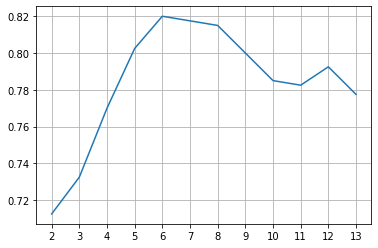

In [41]:
plt.plot(accuracy)
plt.xticks(list(range(len(max_depth_range))),max_depth_range)
plt.grid()
plt.show()



> ¿Cúal es el "max_depth" óptimo? Entrene su árbol con el "max_depth" hallado



In [42]:
from sklearn.tree import DecisionTreeClassifier
clasificador = DecisionTreeClassifier(max_depth=6)
clasificador.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')



> Observe los Scores de la data de entrenamiento y validación ¿Cúal Score aumento y cúal disminuyó? ¿Por qué sucede esto?



In [45]:
clasificador.score(x_train,y_train)

0.93125

In [43]:
clasificador.score(x_val,y_val)

0.82

###Graficando el árbol



> Gráfique su árbol de clasificación



In [0]:
from sklearn.tree import export_graphviz
import graphviz
etiquetas = ['Común','Gama Baja','Gama Media','Gama Alta'] #Nombres para las 4 clases existentes en price_range
dot_data = export_graphviz(clasificador,feature_names= x.columns,class_names= etiquetas,filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("Clasificacion-Smathphone",format='png') #Función que permite guardar una imagen del árbol generado
graph



> Ya generamos nuestro árbol de clasificación con el "max_depth" óptimo, mas el arbol puede resultar un poco grande al momento de analizarlo ¿Es posible disminuir el nivel (max_depth) a costa de perder Score pero ganando simplicidad? Si es posible, ¿Cúal cree que podría ser el nuevo "max_depth" para llegar a esa simplicidad?



In [49]:
from sklearn.tree import DecisionTreeClassifier
clasificador = DecisionTreeClassifier(max_depth=4)
clasificador.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')